# Digit classification with the Kernel Perceptron


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def polynomial_kernel(X, y, p):
    return (1 + X @ y.T) ** p

In [ ]:
def multi_fit(X, y, T, D):
    
    n_class = y.unique()
    
    S_list = []
    y_S_list = []
    index_list = []
    
    for c in range(len(n_class)):
    
        print('I am currently trying to figure out how number', c , 'look like')
        y_class = np.where(y == c,1,-1)
        S = X[0]
        y_S = y_class[0]
        index = 0
    
        for t in range(T):
            for j in range(X.shape[0] - 1):
                if np.sign(np.sum(y_S.T * ((1 + S @ X[j+1])**D))) != y_class[j+1]:
                    S = np.vstack([S, X[j+1]])
                    y_S = np.vstack([y_S, y_class[j+1]])
                    index = np.vstack([index,((j+1)+X.shape[0]*t)])
                
        S_list.append(S)
        y_S_list.append(y_S)
        index_list.append(index)
        
    return S_list, y_S_list, index_list

In [ ]:
def average_predictors(S, y_S, index, X, T):
    S_avg_list = []
    y_S_avg_list = []
    
    for i in range(len(S)):
        weight = S[i] * (((X.shape[0]*(T))-index[i])/(X.shape[0]*(T)))
        y_weight = y_S[i] * (((X.shape[0]*(T))-index[i])/(X.shape[0]*(T)))
        S_avg_list.append(weight)
        y_S_avg_list.append(y_weight)
        
    return S_avg_list, y_S_avg_list

## Import Data

In [ ]:
train = pd.read_csv ('mnist_train.csv')
test = pd.read_csv ('mnist_test.csv')

In [ ]:
train = train.sample(frac = 1)

In [ ]:
X = train.iloc[:,1:].to_numpy()
y = train.iloc[:,0]
X_test = test.iloc[:,1:].to_numpy()
y_test = test.iloc[:,0]

In [ ]:
X = X/255
X_test = X_test/255

## Binary Classification

### Average Predictor

In [ ]:
epochs = 4
deg = [3,4,5,6,7,8,9,10]
binary_result_test = []
binary_result_train = []
for d in deg:
    print('Currently running multi class for T =' , epochs, 'degree =',d)
    S, y_S, index = multi_fit(X,y, T = epochs, D = d)
    avg, y_avg = average_predictors(S, y_S, index, X, T = epochs)
    print('It is prediction time!')
        
    for c in range(len(avg)):
        y_test_class = np.where(y_test == c,1,-1)
        y_train_class = np.where(y == c, 1,-1)
        p = np.sign(np.sum(y_avg[c] * polynomial_kernel(avg[c],X_test, p = d),axis=0))
        r = np.count_nonzero(p - y_test_class)/10000
        binary_result_test.append(r)
        p = np.sign(np.sum(y_avg[c] * polynomial_kernel(avg[c],X, p = d),axis=0))
        r = np.count_nonzero(p - y_train_class)/60000
        binary_result_train.append(r)

Enter your number: 9


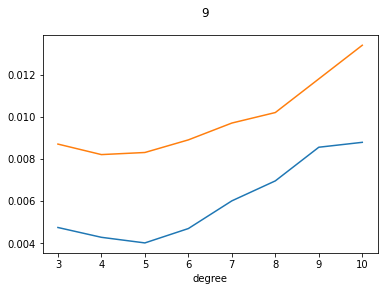

In [224]:
deg = [3,4,5,6,7,8,9,10]
n = input("Enter your number: ")


fig = plt.figure()
plt.plot(deg, binary_result_train[int(n):80:10], label = "Train Error", )
plt.plot(deg, binary_result_test[int(n):80:10], label = "Test Error")
fig.suptitle(str(n))
plt.xlabel('degree')
#plt.savefig(n + 'avg.eps', format='eps')
plt.show()


### Best Predictor

In [69]:
S, y_S, index = multi_fit(X,y, T = 3, D = 3)

I am currently trying to figure out how number 0 look like
I am currently trying to figure out how number 1 look like
I am currently trying to figure out how number 2 look like
I am currently trying to figure out how number 3 look like
I am currently trying to figure out how number 4 look like
I am currently trying to figure out how number 5 look like
I am currently trying to figure out how number 6 look like
I am currently trying to figure out how number 7 look like
I am currently trying to figure out how number 8 look like
I am currently trying to figure out how number 9 look like


In [237]:
n = input("Enter your number: ")

binary_result_train_all = []
binary_result_test_all = []

kernel_train = polynomial_kernel(S[int(n)],X, p = 3)
kernel_test = polynomial_kernel(S[int(n)],X_test, p = 3)
y_class = y_S[int(n)]
y_train_class = np.where(y == int(n), 1, -1)
y_test_class = np.where(y_test == int(n), 1, -1)

for h in range(kernel_train.shape[0]):
    p = np.sign(np.sum(y_class[:h] * kernel_train[:h],axis=0))
    binary_result_train_all.append(np.count_nonzero(p - y_train_class))

for h in range(kernel_test.shape[0]):
    p = np.sign(np.sum(y_class[:h] * kernel_test[:h],axis=0))
    binary_result_test_all.append(np.count_nonzero(p - y_test_class))

Enter your number: 0


In [238]:
min_train = binary_result_train_all.index(min(binary_result_train_all))
min_test = binary_result_test_all.index(min(binary_result_test_all))

In [239]:
print(min(binary_result_train_all)/60000, min_train)
print(min(binary_result_test_all)/10000, min_test)

0.0006666666666666666 730
0.0018 730


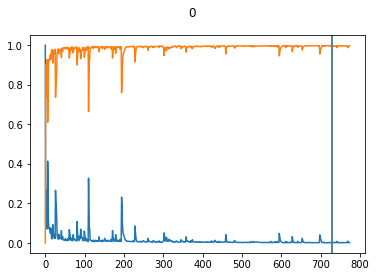

In [240]:
fig = plt.figure()
plt.plot(np.array(binary_result_train_all)/60000, label = "Train Error")
plt.plot(1 - (np.array(binary_result_test_all)/10000), label = "Test Error")
plt.axvline(x=min_test, color = 'orange')
plt.axvline(x=min_train)
fig.suptitle(str(n))
#plt.savefig(n + 'best.eps', format='eps')
plt.show()

## Multiclass Classification

In [ ]:
epo = [1,2,3,4,5,6,7,8,9,10]
deg = [1,2,3,4,5,6]

results = []

for e in epo:
    for d in deg: 
        print('Currently running multi class for T =' , e, 'degree =',d)
        S, y_S, index = multi_fit(X,y, T = e, D = d)
        avg, y_avg = average_predictors(S, y_S, index, X, T = e)
        projections = []
        print('It is prediction time!')
        
        for c in range(len(avg)): 
            p = np.sum(y_avg[c] * polynomial_kernel(avg[c],X_test, p = d),axis=0)
            projections.append(p)
            
        projectionst = pd.DataFrame(projections).T
        y_hat = projectionst.idxmax(axis = 1)
        results.append(np.count_nonzero(y_hat - y_test))
        print('I have made',np.count_nonzero(y_hat - y_test),'mistake on the test data :(')

In [141]:
#results = pd.read_csv('results.csv', header = None)
results = results/10000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


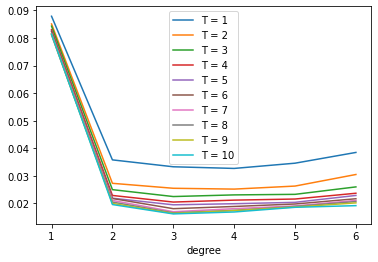

In [246]:
deg = [1,2,3,4,5,6]

fig = plt.figure()
plt.plot(deg, results[0:6], label = "T = 1")
plt.plot(deg, results[6:12], label = "T = 2")
plt.plot(deg, results[12:18], label = "T = 3")
plt.plot(deg, results[18:24], label = "T = 4")
plt.plot(deg, results[24:30], label = "T = 5")
plt.plot(deg, results[30:36], label = "T = 6")
plt.plot(deg, results[36:42], label = "T = 7")
plt.plot(deg, results[42:48], label = "T = 8")
plt.plot(deg, results[48:54], label = "T = 9")
plt.plot(deg, results[54:60], label = "T = 10")
plt.xlabel('degree')
plt.legend()
#plt.savefig('multi1_T.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


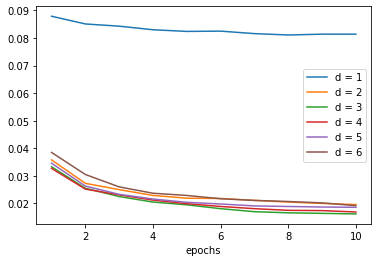

In [247]:
epo = [1,2,3,4,5,6,7,8,9,10]

fig = plt.figure()
plt.plot(epo, results[0:60:6], label = "d = 1")
plt.plot(epo, results[1:60:6], label = "d = 2")
plt.plot(epo, results[2:60:6], label = "d = 3")
plt.plot(epo, results[3:60:6], label = "d = 4")
plt.plot(epo, results[4:60:6], label = "d = 5")
plt.plot(epo, results[5:60:6], label = "d = 6")
plt.xlabel('epochs')
plt.legend()
#plt.savefig('multi1_D.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


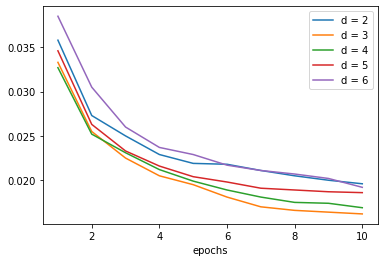

In [248]:
epo = [1,2,3,4,5,6,7,8,9,10]

fig = plt.figure()
plt.plot(epo, results[1:60:6], label = "d = 2")
plt.plot(epo, results[2:60:6], label = "d = 3")
plt.plot(epo, results[3:60:6], label = "d = 4")
plt.plot(epo, results[4:60:6], label = "d = 5")
plt.plot(epo, results[5:60:6], label = "d = 6")
plt.xlabel('epochs')
plt.legend()
#plt.savefig('multi1_D2.eps', format='eps')
plt.show()

In [ ]:
epo = [11,12,13,14,15]
deg = [3,4,5,6,7,8]

results2 = []

for e in epo:
    for d in deg: 
        print('Currently running multi class for T =' , e, 'degree =',d)
        S, y_S, index = multi_fit(X,y, T = e, D = d)
        avg, y_avg = average_predictors(S, y_S, index, X, T = e)
        projections = []
        print('It is prediction time!')
        
        for c in range(len(avg)): 
            p = np.sum(y_avg[c] * polynomial_kernel(avg[c],X_test, p = d),axis=0)
            projections.append(p)
            
        projectionst = pd.DataFrame(projections).T
        y_hat = projectionst.idxmax(axis = 1)
        results2.append(np.count_nonzero(y_hat - y_test))
        print('I have made',np.count_nonzero(y_hat - y_test),'mistake on the test data :(')

In [166]:
#results2 = pd.read_csv('results2.csv', header = None)
results2 = results2/10000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


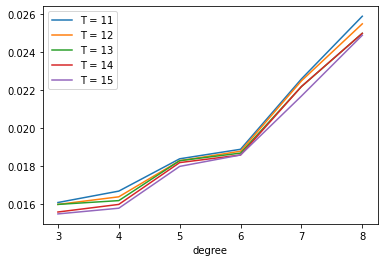

In [249]:
deg = [3,4,5,6,7,8]

fig = plt.figure()
plt.plot(deg, results2[0:6], label = "T = 11")
plt.plot(deg, results2[6:12], label = "T = 12")
plt.plot(deg, results2[12:18], label = "T = 13")
plt.plot(deg, results2[18:24], label = "T = 14")
plt.plot(deg, results2[24:30], label = "T = 15")
plt.xlabel('degree')
plt.legend()
#plt.savefig('multi2_T.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


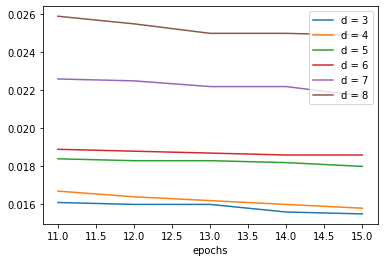

In [250]:
epo = [11,12,13,14,15]

fig = plt.figure()
plt.plot(epo, results2[0:30:6], label = "d = 3")
plt.plot(epo, results2[1:30:6], label = "d = 4")
plt.plot(epo, results2[2:30:6], label = "d = 5")
plt.plot(epo, results2[3:30:6], label = "d = 6")
plt.plot(epo, results2[4:30:6], label = "d = 7")
plt.plot(epo, results2[5:30:6], label = "d = 8")
plt.xlabel('epochs')
plt.legend()
#plt.savefig('multi2_D.eps', format='eps')
plt.show()